In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

import czifile
# from pathlib import Path
import os
from skimage import morphology, exposure, filters
# from skimage.feature import canny
from skimage.measure import regionprops, regionprops_table, label
from scipy import ndimage, misc

In [128]:
def load_data(path, channel_dict, channel_list):
    czi = czifile.imread(path)
    img=czi.squeeze()
    data = {}
    for channel in channel_list:
        data[channel] = img[channel_dict[channel],...]
    
    return data, img

# path = '/Users/robinhood/O2_outputs/imgproc/new_thresh_test/wt_20220414_gtCAD_2.czi'
# path = '/Users/robinhood/O2_outputs/imgproc/new_thresh_test/wt_20220328_gtCAD_4.czi'
# path = '/Users/robinhood/O2_outputs/imgproc/new_thresh_test/wt_20220414_gtCAD_4.czi'
# path = '/Users/robinhood/O2_outputs/imgproc/new_thresh_test/wt_20220414_gtCAD_9.czi'
path = '/Users/robinhood/O2_outputs/imgproc/new_thresh_test/esc_20220412_14.czi'
# path = '/Users/robinhood/O2_outputs/imgproc/new_thresh_test/sfmbt_20210926_18.czi'


channel_dict = {'DAPI': 0, 'TL':1, 'CAD':3, 'pho':2, 'gt':4}
channel_list = ['DAPI', 'CAD', 'pho', 'gt'] #keep for iteration
data = load_data(path, channel_dict, channel_list)[0]

In [155]:

def get_thresholded(data, method='LIV_1', shape_channel='DAPI', z_plane=None, bkgd=200):
    if method.upper() == 'LIV_1':
        # JEFE_3 THRESHOLD
        footprint=morphology.disk(25)
        zshape = data[shape_channel].astype(float).std(0)
        # zshape = data[shape_channel].astype(float).max(0)    

        zshape -= zshape.min()
        zshape[zshape < 0] = 0

         # Normalize to range of [-1, 1]
        zshape /= (zshape.max() / 2)
        zshape -= 1
        zshape = exposure.equalize_hist(zshape)
        zshape = exposure.equalize_adapthist(zshape)

        zshape -= filters.threshold_otsu(zshape)
        zshape[zshape < 0] = 0

        bkgd = filters.threshold_otsu(np.nanquantile(zshape.flatten(), 0.7))
        
        # max_signal = np.max(zshape)-1
        max_signal = np.nanquantile(zshape.flatten(), 0.99)

        zshape = filters.apply_hysteresis_threshold(zshape, bkgd, max_signal)
    
        zshape = filters.threshold_sauvola(zshape)

        zshape = morphology.binary_closing(zshape)
        zshape = morphology.binary_dilation(zshape, footprint)
        zshape = morphology.binary_closing(zshape)
        zshape = morphology.binary_erosion(zshape, footprint)

        # structure = np.ones((3, 3))
        zshape = ndimage.binary_fill_holes(zshape)#, structure)
        
    elif method.upper() == 'LIV_2':
            # JEFE_3 THRESHOLD
            footprint=morphology.disk(25)
            zshape = data[shape_channel].astype(float).std(0)
            # zshape = data[shape_channel].astype(float).max(0)    

            zshape -= zshape.min()
            zshape[zshape < 0] = 0

            # Normalize to range of [-1, 1]
            zshape /= (zshape.max() / 2)
            zshape -= 1
            zshape = exposure.equalize_hist(zshape)
            zshape = exposure.equalize_adapthist(zshape)

            zshape -= filters.threshold_otsu(zshape)
            zshape[zshape < 0] = 0

            zshape = filters.threshold_sauvola(zshape, window_size=27)

            bkgd = filters.threshold_otsu(np.nanquantile(zshape.flatten(), 0.7))        
            # max_signal = np.max(zshape)-1
            max_signal = np.nanquantile(zshape.flatten(), 0.99)
            zshape = filters.apply_hysteresis_threshold(zshape, bkgd, max_signal)
        
            # zshape = filters.threshold_sauvola(zshape)

            zshape = morphology.binary_closing(zshape)
            zshape = morphology.binary_dilation(zshape, footprint)
            zshape = morphology.binary_closing(zshape)
            zshape = morphology.binary_erosion(zshape, footprint)

            # structure = np.ones((3, 3))
            zshape = ndimage.binary_fill_holes(zshape)#, structure)
        
    elif method.upper() == 'LIV_3':
            # JEFE_3 THRESHOLD
            footprint=morphology.disk(25)
            zshape = data[shape_channel].astype(float).std(0)
            # zshape = data[shape_channel].astype(float).max(0)    

            zshape -= zshape.min()
            zshape[zshape < 0] = 0

            # Normalize to range of [-1, 1]
            zshape /= (zshape.max() / 2)
            zshape -= 1
            zshape = exposure.equalize_hist(zshape)
            zshape = exposure.equalize_adapthist(zshape)

            zshape -= filters.threshold_otsu(zshape)
            zshape[zshape < 0] = 0

            zshape = filters.threshold_sauvola(zshape, window_size=33)

            bkgd = filters.threshold_otsu(np.nanquantile(zshape.flatten(), 0.7))        
            # max_signal = np.max(zshape)-1
            max_signal = np.nanquantile(zshape.flatten(), 0.99)
            zshape = filters.apply_hysteresis_threshold(zshape, bkgd, max_signal)
        
            zshape = filters.threshold_sauvola(zshape, window_size=33)

            zshape = morphology.binary_closing(zshape)
            zshape = morphology.binary_dilation(zshape, footprint)
            zshape = morphology.binary_closing(zshape)
            zshape = morphology.binary_erosion(zshape, footprint)

            # structure = np.ones((3, 3))
            zshape = ndimage.binary_fill_holes(zshape)#, structure)
            
    plt.imshow(zshape)
    plt.colorbar()

    return zshape

# zshape = get_thresholded(data)

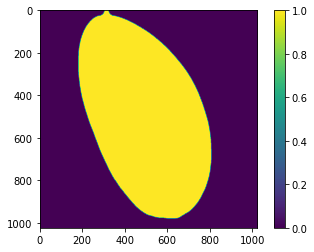

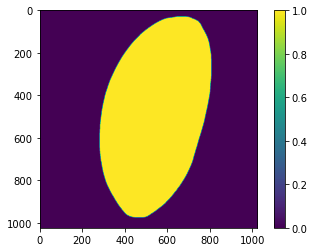

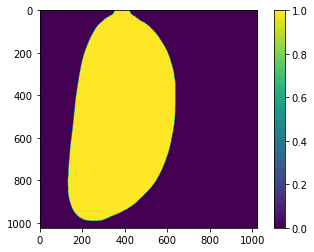

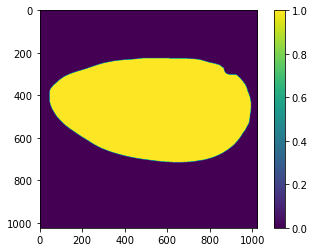

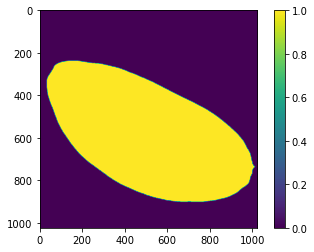

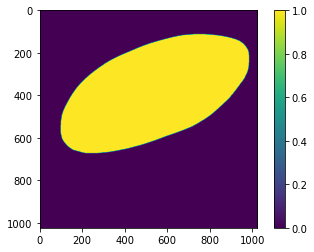

In [156]:
paths = ['/Users/robinhood/O2_outputs/imgproc/new_thresh_test/wt_20220414_gtCAD_2.czi',
'/Users/robinhood/O2_outputs/imgproc/new_thresh_test/wt_20220328_gtCAD_4.czi',
'/Users/robinhood/O2_outputs/imgproc/new_thresh_test/wt_20220414_gtCAD_4.czi',
'/Users/robinhood/O2_outputs/imgproc/new_thresh_test/wt_20220414_gtCAD_9.czi',
'/Users/robinhood/O2_outputs/imgproc/new_thresh_test/esc_20220412_14.czi',
'/Users/robinhood/O2_outputs/imgproc/new_thresh_test/sfmbt_20210926_18.czi']

for path in paths:
    data = load_data(path, channel_dict, channel_list)[0]
    zshape = get_thresholded(data, method='LIV_3')
    plt.show()


In [ ]:
def get_orientation(data, method='OHTSU', shape_channel='DAPI', ap_channel='DAPI', z_plane=None, bkgd=200):
    #get thresholded
    zshape = get_thresholded(data, method, shape_channel, z_plane, bkgd)

    max_AP = data[ap_channel].max(0) # this will be how to pick AP axis
    
    #get_dimensions
    # emb_label= label(zshape.astype(np.uint8))
    emb_regions = regionprops(zshape.astype(np.uint8))
    areas = [emb['area'] for emb in emb_regions]
    props = emb_regions[np.argmax(areas)]

    y0, x0 = props.centroid
    orientation = props.orientation
    # long_axis = props.major_axis_length
    # short_axis = props.minor_axis_length
    # minr, minc, maxr, maxc = props.bbox
    ys = [y0]
    xs = [x0]
    xs.append(x0 + math.cos(orientation) * 0.5 * props.minor_axis_length) #top
    ys.append(y0 - math.sin(orientation) * 0.5 * props.minor_axis_length)
    xs.append(x0 - math.sin(orientation) * 0.5 * props.major_axis_length)
    ys.append(y0 - math.cos(orientation) * 0.5 * props.major_axis_length)
    xs.append(x0 - math.cos(orientation) * 0.5 * props.minor_axis_length) #bottom
    ys.append(y0 + math.sin(orientation) * 0.5 * props.minor_axis_length)            
    xs.append(x0 + math.sin(orientation) * 0.5 * props.major_axis_length)
    ys.append(y0 + math.cos(orientation) * 0.5 * props.major_axis_length)

    rotation_axis = 90 - (orientation * 180/math.pi)
    rotated_AP = ndimage.rotate(max_AP, rotation_axis)
    rotated_AP = exposure.adjust_gamma(rotated_AP)
    return zshape, rotation_axis, rotated_AP, xs, ys


def show_orientation(zshape, rotated_AP, xs, ys, filename=None, path=None):
    fig, ax = plt.subplots(1,2, figsize=(25,25))
    ax[0].imshow(zshape, cmap=plt.cm.gray)
    ax[0].plot((xs[3], xs[1]), (ys[3], ys[1]), '-y', linewidth=10) #minor axis line
    ax[0].plot((xs[4], xs[2]), (ys[4], ys[2]), '-m', linewidth=10) #major axis line
    ax[0].plot(xs[0], ys[0], '.g', markersize=25)

    ax[1].imshow(rotated_AP, cmap=plt.cm.gray)

        #time to save
    if filename is not None:
        if path is not None:
            if path[-4:] == '.czi':
                os.makedirs(path[:-4], exist_ok=True)
                filepath = f"{path[:-4]}_APcheck"
            else:
                os.makedirs(path, exist_ok=True)
                filepath = os.path.join(path, f"{filename[:-4]}_APcheck")
            fig.savefig(filepath)
        else:
            fig.savefig(f"{filename[:-4]}_APcheck")
    return fig


def show_thresh_test(data, 
                    methods_list=['OHTSU', 'GAMMA', 'DILL', 'JEFE_1', 'JEFE_2', 'JEFE_3', 'Last_ditch'], 
                    shape_channel='DAPI', 
                    ap_channel='DAPI', 
                    z_plane=None, 
                    bkgd=200):
    fig, axs = plt.subplots(len(methods_list), 2, figsize=(10, 5*len(methods_list)))
    for i, method in enumerate(methods_list):
        zshape, _, rotated_AP, xs, ys = get_orientation(data, method, shape_channel, ap_channel, z_plane, bkgd)
        axs[i, 0].imshow(zshape, cmap=plt.cm.gray)
        axs[i, 0].plot((xs[3], xs[1]), (ys[3], ys[1]), '-y', linewidth=7) #minor axis line
        axs[i, 0].plot((xs[4], xs[2]), (ys[4], ys[2]), '-m', linewidth=7) #major axis line
        axs[i, 0].plot(xs[0], ys[0], '.g', markersize=15)
        axs[i, 0].set_title(f'{method}: masked')
        axs[i, 0].set_xticks([])
        axs[i, 0].set_yticks([])
        axs[i, 1].imshow(rotated_AP, cmap=plt.cm.gray)
        axs[i, 1].set_title(f'{method}: rotated')
        axs[i, 1].set_xticks([])
        axs[i, 1].set_yticks([])

    return fig


# def get_oriented_plane(data, z_plane, rotation_axis, flip_hor=False):
#     output = {}
#     for key, value in data.items():



In [ ]:
def get_thresholded(data, method='LIV_2', shape_channel='DAPI', z_plane=None, bkgd=200):
    if method.upper() == 'LIV_2':
        # JEFE_3 THRESHOLD
        footprint=morphology.disk(25)
        zshape = data[shape_channel].astype(float).std(0)
        # zshape = data[shape_channel].astype(float).max(0)    

        zshape -= zshape.min()
        zshape[zshape < 0] = 0

         # Normalize to range of [-1, 1]
        zshape /= (zshape.max() / 2)
        zshape -= 1
        zshape = exposure.equalize_hist(zshape)
        zshape = exposure.equalize_adapthist(zshape)

        zshape -= filters.threshold_otsu(zshape)
        zshape[zshape < 0] = 0

        zshape = filters.threshold_sauvola(zshape, window_size=27)

        bkgd = filters.threshold_otsu(np.nanquantile(zshape.flatten(), 0.7))        
        # max_signal = np.max(zshape)-1
        max_signal = np.nanquantile(zshape.flatten(), 0.99)
        zshape = filters.apply_hysteresis_threshold(zshape, bkgd, max_signal)
    
        # zshape = filters.threshold_sauvola(zshape)

        zshape = morphology.binary_closing(zshape)
        zshape = morphology.binary_dilation(zshape, footprint)
        zshape = morphology.binary_closing(zshape)
        zshape = morphology.binary_erosion(zshape, footprint)

        # structure = np.ones((3, 3))
        zshape = ndimage.binary_fill_holes(zshape)#, structure)
        
        plt.imshow(zshape)
        plt.colorbar()

    return zshape